## **Transfer Learning**

Why train from scratch when we can use existing models

**3 ways for transfer learning**
1. Use a pre-trained model as-is without chainging anything
2. Feature extraction - Remove the old model's classifier layer, take the output from the pre-trained model, and then use this output to train a new classifier. So basically, extract features from the pre-trained model and train new classifier with this
3. Fine Tuning the pre-trained model - Use the pre-trained weights as initial weights and the fine-tune the pre-trained model for your own application

#### **Transfer Learning Rule of Thumb**
1. Training data = SMALL, Similarity to Original Training Data = SIMILAR:
  - Do NOT fine-tune, the model may overfit due to small training data
  - Remove the FC layer, and add new FC layer
  - Freeze the weights of the pre-trained layers
  - Train the network with frozen pre-trained layer and trainable classifier layer

2. Training data = LARGE, Similarity = SIMILAR:
  - There's less chance of overfitting due to large dataset
  - Replace the classifer FC layer with new one
  - Keep the pre-trained network trainable
  - Train the new network with original weights
  - Good idea to start with smaller learning-rate and observe the behavior 

3. Training Data = SMALL, Similarity = LESS or NONE:
  - Chance of overfitting, and higher level features arent very useful here since the dataset is different
  - Remove the FC classifier layer, and also some of the higher level layers 
  - Add new FC layer, and keep the entire network trainable (unfrozen)
  - Train the entire model

4. Training Data = LARGE, Similarity = LESS or NONE:
  - The best way here would be to start training the entire network initializing from the pre-trained weights 
  - Another way would be to follow the steps similar to the ones mentioned in point 3

[Check out this awesome article for Deep Learning Rule of Thumbs](https://jeffmacaluso.github.io/post/DeepLearningRulesOfThumb/)

### **Lets take a look at the tf.keras applications API first**

[tf.keras applications API](https://www.tensorflow.org/api_docs/python/tf/keras/applications)

#### Getting DataSets From Kaggle

[Follow these instructions](https://www.kaggle.com/general/74235)

OR FOLLOW ALONG WITH THE VIDEO

[How to get started with Kaggle](https://www.kaggle.com/getting-started/45113)

**Step 1** -- go to Kaggle.com > Account > Create New API > Download kaggle.json  

In [ ]:
## STEP 2 -- install kaggle CLI
!pip install kaggle

In [ ]:
## STEP 3 -- Upload kaggle.json
## Perform this step only in Scratch pad
import os

if 'kaggle.json' not in os.listdir():
  from google.colab import files
  files.upload()   

In [ ]:
## STEP 4 -- Make new .kaggle directory and move kaggle.json there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
## STEP 5 -- Change file permissions
!chmod 600 ~/.kaggle/kaggle.json 

In [ ]:
## Check 
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-06-29 17:04:40          85179  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          14763  
madeleineferguson/farmers-markets-in-the-united-states      Farmers Markets in the United States                816KB  2020-06-10 16:41:46            830  
promptcloud/jobs-on-naukricom                               Jobs On Naukri.com                                    3MB  2020-06-15 10:51:07            877  
mikahama/the-best-sarcasm-annotated-dataset-in-spanish      The 

STEP 6 -- Download our dataset using the following command

> COMMAND 
> - !kaggle competitions download -c 'name-of-competition'

> kaggle datasets download -d alessiocorrado99/animals10

**Go to dataset page > Click on the 3 dots menu next to "New Notebook" > Copy CLI Command**

[Link for the dataset kaggle page](https://www.kaggle.com/alessiocorrado99/animals10)

In [ ]:
## get the dataset
!kaggle datasets download -d alessiocorrado99/animals10

animals10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
## unzip the dataset
!unzip -n animals10.zip
!ls

Archive:  animals10.zip
animals10.zip  kaggle.json  raw-img	 translate.py
dataset        model.png    sample_data


In [ ]:
import os

In [ ]:
len(os.listdir('raw-img/cane'))

4863

In [ ]:
for i in os.listdir('raw-img'):
  print(len(os.listdir('raw-img/'+i)))

4863
2112
1446
1668
2623
1820
1866
3098
4821
1862


In [ ]:
## install split-folders to sort our images 
## here's the link to split-folders https://pypi.org/project/split-folders/
!pip install split-folders

In [ ]:
import split_folders as sf

In [ ]:
## make dataset folder to store output of split_folder
!mkdir dataset

mkdir: cannot create directory ‘dataset’: File exists


In [ ]:
## split our dataset
sf.ratio('raw-img', output='dataset', seed=10, ratio=(0.8, 0.1, 0.1))

Copying files: 26179 files [00:12, 2014.60 files/s]


In [ ]:
## check
for i in os.listdir('dataset'):
  print("="*10 + i + "="*10)
  for j in os.listdir(os.path.join('dataset/', i)):
    print(j, " :: ", len(os.listdir(os.path.join('dataset', i, j))))

==========test==========
cane  ::  487
farfalla  ::  212
elefante  ::  146
gatto  ::  168
cavallo  ::  263
pecora  ::  182
mucca  ::  188
gallina  ::  311
ragno  ::  483
scoiattolo  ::  187
==========train==========
cane  ::  3890
farfalla  ::  1689
elefante  ::  1156
gatto  ::  1334
cavallo  ::  2098
pecora  ::  1456
mucca  ::  1492
gallina  ::  2478
ragno  ::  3856
scoiattolo  ::  1489
==========val==========
cane  ::  486
farfalla  ::  211
elefante  ::  144
gatto  ::  166
cavallo  ::  262
pecora  ::  182
mucca  ::  186
gallina  ::  309
ragno  ::  482
scoiattolo  ::  186


In [ ]:
## lets check out some images 
import matplotlib.pyplot as plt
import cv2

plt.style.use('dark_background')

In [ ]:
classes = os.listdir('dataset/train')
classes

['cane',
 'farfalla',
 'elefante',
 'gatto',
 'cavallo',
 'pecora',
 'mucca',
 'gallina',
 'ragno',
 'scoiattolo']

In [ ]:
def show_image(num):
  imagename = os.listdir('dataset/train/' + classes[num])[0]
  path = os.path.join('dataset/train', classes[num], imagename)
  img = cv2.imread(path)
  plt.imshow(img);
  plt.title(classes[num])

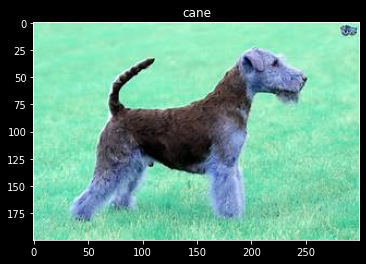

In [ ]:
show_image(0)

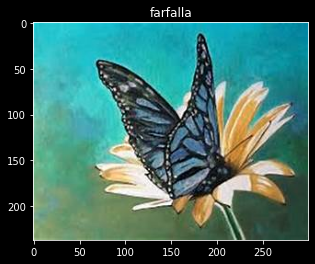

In [ ]:
show_image(1)

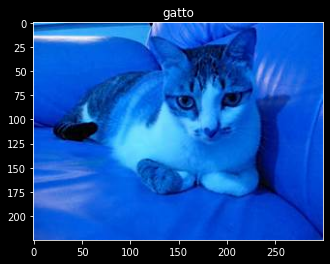

In [ ]:
show_image(3)

### **Data Augmentation and Keras ImageDataGenerators**

[ImageDataGenerator API](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [ ]:
## create data generators 
train_generator = ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.2,
    preprocessing_function=preprocess_input
)

val_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [ ]:
## flow data from directory
train_flow = train_generator.flow_from_directory(
    'dataset/train',
    target_size=(128, 128), ## mobilenet accepts images of 96, 128, 160 etc 
    batch_size=32,
    #class_mode='binary'
)

val_flow = val_generator.flow_from_directory(
    'dataset/val',
    target_size=(128, 128),
    batch_size=32,
    #class_mode='binary'
)

test_flow = test_generator.flow_from_directory(
    'dataset/test',
    target_size=(128, 128),
    batch_size=32,
    #class_mode='binary'
)

Found 20938 images belonging to 10 classes.
Found 2614 images belonging to 10 classes.
Found 2627 images belonging to 10 classes.


In [ ]:
dir(train_flow)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'labels',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'samples',
 'save_format',
 'save_prefix',
 'save_to_dir',
 'see

In [ ]:
train_flow.classes, train_flow.class_indices

(array([0, 0, 0, ..., 9, 9, 9], dtype=int32),
 {'cane': 0,
  'cavallo': 1,
  'elefante': 2,
  'farfalla': 3,
  'gallina': 4,
  'gatto': 5,
  'mucca': 6,
  'pecora': 7,
  'ragno': 8,
  'scoiattolo': 9})

In [ ]:
## lets extract some information out of it
NUM_CLASSES = train_flow.num_classes
CLASSES = {val: key for key, val in train_flow.class_indices.items()}
CLASSES

{0: 'cane',
 1: 'cavallo',
 2: 'elefante',
 3: 'farfalla',
 4: 'gallina',
 5: 'gatto',
 6: 'mucca',
 7: 'pecora',
 8: 'ragno',
 9: 'scoiattolo'}

In [ ]:
NUM_CLASSES

10

### **Now to the transfer learning part**

We will use the Mobilenet_v2 inbuilt model

[Check it out here](https://keras.io/api/applications/mobilenet/)

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Input
## if using GlobalAveragePooling2D, use pooling='avg' while importing the base_model

In [ ]:
base_model = MobileNetV2(input_shape=(128, 128, 3), weights='imagenet', include_top=False)

In [ ]:
dir(base_model)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_inbound_node',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_attribute_sentinel',
 '_auto_track_sub_layers',
 '_autocast',
 '_base_init',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_collect_input_masks',
 '_compile_was_called',
 '_compiled_trainable_state',
 '_compute_dtype',
 '_co

In [ ]:
from tensorflow.keras.utils import plot_model

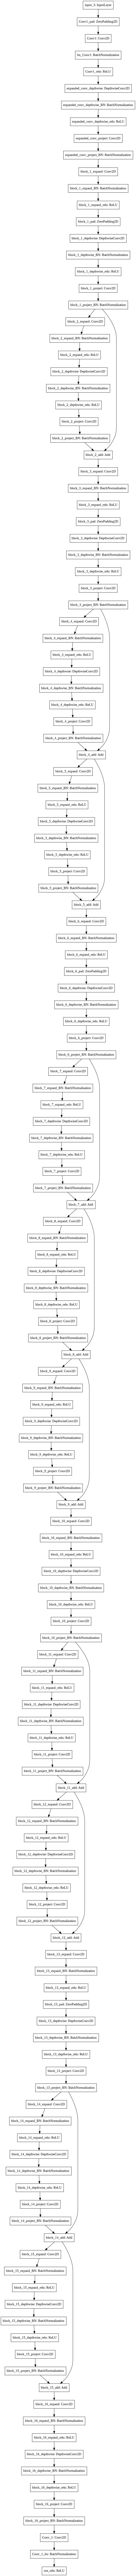

In [ ]:
plot_model(base_model)

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

#### **Lets freeze the layers**

In [ ]:
base_model.layers[:10]

In [ ]:
dir(base_model.layers[0])

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_inbound_node',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_attribute_sentinel',
 '_auto_track_sub_layers',
 '_autocast',
 '_batch_input_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_collect_input_masks',
 '_compute_dtype',
 '_dedup_weights',
 '_deferred_dependencies',
 '_dtype',
 '_dtype_defaulted_to_floatx',
 '_dtype_policy',
 '_dynamic',
 '_eager_add

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

####**Now lets connect a new classification layer on top of it**

[Official TF Transfer Learning Guide](https://www.tensorflow.org/guide/keras/transfer_learning)

In [ ]:
output = base_model.output

In [ ]:
## input layer
inputs = Input(shape=(128, 128, 3))

## input goes to base model
x = base_model(inputs, training=False) ## put training=False just to be sure

## add globalpooling 
x = GlobalAveragePooling2D()(x)

## add classification layers
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)

## final output layer 
out = Dense(NUM_CLASSES, activation='softmax')(x) 

#### **Detour - Keras Functional API**

[Check it out over here](https://keras.io/guides/functional_api/)

**(Taken from Keras page)** - "The functional API can handle models with non-linear topology, models with shared layers, and models with multiple inputs or outputs"

The functional API provides such functions as concatenate, which helps put non-linear graphs easily - 

x = layers.concatenate([layerA, LayerB, layerC])

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model = Model(inputs=inputs, outputs=out)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1311744   
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130

In [ ]:
## compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
## train
## model.fit_generator is deprecated. But model.fit does not support validation generators

history = model.fit_generator(
    generator=train_flow,
    epochs=5,
    validation_data=val_flow,
    shuffle=True,
)

Epoch 1/5
655/655 [==============================] - 113s 172ms/step - loss: 0.3549 - accuracy: 0.8922 - val_loss: 0.2149 - val_accuracy: 0.9384
Epoch 2/5
655/655 [==============================] - 114s 173ms/step - loss: 0.2324 - accuracy: 0.9292 - val_loss: 0.1874 - val_accuracy: 0.9438
Epoch 3/5
655/655 [==============================] - 114s 173ms/step - loss: 0.2068 - accuracy: 0.9347 - val_loss: 0.2257 - val_accuracy: 0.9373
Epoch 4/5
655/655 [==============================] - 114s 174ms/step - loss: 0.1748 - accuracy: 0.9461 - val_loss: 0.2136 - val_accuracy: 0.9415
Epoch 5/5
655/655 [==============================] - 114s 174ms/step - loss: 0.1613 - accuracy: 0.9510 - val_loss: 0.2007 - val_accuracy: 0.9419


In [ ]:
## function to plot loss and accuracy

def plot_history(history): 
  fig = plt.figure(figsize=(10, 4))
  ## accuracy plot
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy of Model')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'test'], loc='lower right')

  ## loss plot
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss of Model')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['train', 'test'], loc='upper right')

  plt.tight_layout()

  fig.show();

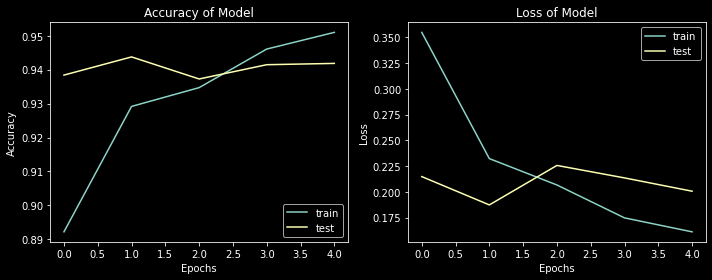

In [ ]:
plot_history(history)

In [ ]:
## score = model.evaluate_generator(test_flow) but lets use model.evaluate instead
score = model.evaluate(x=test_flow, batch_size=32, return_dict=True)
print(score)

83/83 [==============================] - 6s 78ms/step - loss: 0.2035 - accuracy: 0.9406
{'loss': 0.20351368188858032, 'accuracy': 0.9406166672706604}


#### PROBLEM -- model.fit_generator is deprecated
#### SOLUTION -- Use model.fit, the new version supports generators for training data
#### BUT -- model.fit does not support validation generators

Lets see a simple temporary workaround - we will use model.fit and val_generator.flow

In [ ]:
val_data = val_generator.flow_from_directory(
    'dataset/val',
    batch_size=-1, ## keep the batch_size -1 to load all validation data into memory in one go
    shuffle=True,
    seed=10 
)

Found 2614 images belonging to 10 classes.


In [ ]:
## load all data into variable
val_data = val_data.next()

In [ ]:
len(val_data)

2

In [ ]:
len(val_data[0]), len(val_data[1])

(2613, 2613)

Epoch 1/5
655/655 [==============================] - 114s 174ms/step - loss: 0.1514 - accuracy: 0.9517 - val_loss: 0.5995 - val_accuracy: 0.8454
Epoch 2/5
655/655 [==============================] - 113s 173ms/step - loss: 0.1307 - accuracy: 0.9579 - val_loss: 0.6423 - val_accuracy: 0.8431
Epoch 3/5
655/655 [==============================] - 113s 172ms/step - loss: 0.1212 - accuracy: 0.9616 - val_loss: 0.5845 - val_accuracy: 0.8668
Epoch 4/5
655/655 [==============================] - 113s 172ms/step - loss: 0.1150 - accuracy: 0.9637 - val_loss: 0.5440 - val_accuracy: 0.8504
Epoch 5/5
83/83 [==============================] - 6s 74ms/step - loss: 0.2792 - accuracy: 0.9326


{'accuracy': 0.9326227903366089, 'loss': 0.27923157811164856}

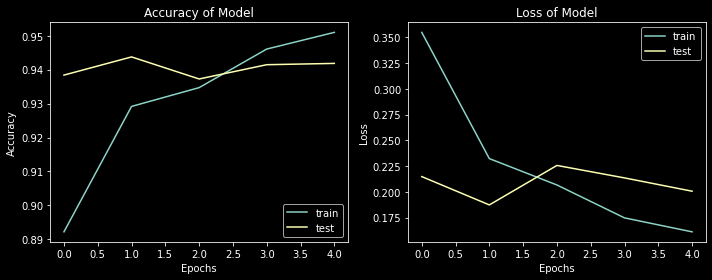

In [ ]:
history2 = model.fit(
    x=train_flow,
    epochs=5,
    validation_data=val_data,
    batch_size=64
)

plot_history(history)

model.evaluate(test_flow, return_dict=True)

### **Exercises**

- Exercise 1 - Play around with Data Augmentation 
  - Hint - Perform different augmentations and save the result to dir **'save_to_dir'** option in the flow_from_directory. This will help you get better understanding of data augmentation
- Exercise 2 - Improve the performance 
  - Hint 1 - Try unfreezing the complete base_model and continue training, after you have reached a good saturation point (for example, after 5-7 epochs)
  - Hint 2 - Try unfreezing the last few layers of the base_model after say 5-10 epochs and see how it trains
  - Hint 3 - Try different hyperparameters and architecture options such as Dropout layers, different learning rates, data augmentation, and more 